## Part 1: Regression on California Test Scores

In [1]:
import pandas as pd
import matplotlib as mpl
import numpy as np

Importing the Califronia Test Score data set

In [2]:
cts = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv")
cts.head(10)

,Unnamed: 0,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024
5,6,62042,Fresno,Burrel Union Elementary,KK-08,137,6.400000,12.318800,86.956497,25,605.550049,0.182482,5580.146973,21.406250,10.415000,12.408759,605.700012,605.400024
6,7,68536,San Joaquin,Holt Union Elementary,KK-08,195,10.000000,12.903200,94.623703,28,606.750000,0.143590,5253.331055,19.500000,6.577000,68.717949,604.500000,609.000000
7,8,63834,Kern,Vineland Elementary,KK-08,888,42.500000,18.806299,100.000000,66,609.000000,0.074324,4565.746094,20.894117,8.174000,46.959461,605.500000,612.500000
8,9,62331,Fresno,Orange Center Elementary,KK-08,379,19.000000,32.189999,93.139801,35,612.500000,0.092348,5355.548340,19.947369,7.385000,30.079157,608.900024,616.099976
9,10,67306,Sacramento,Del Paso Heights Elementary,KK-06,2247,108.000000,78.994202,87.316399,0,612.650024,0.000000,5036.211426,20.805555,11.613333,40.275921,611.900024,613.400024


### 1.1 Visualizing univariate distributions of the target: testscr with teachers per student, expenditure per student, and average income

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Test scores')

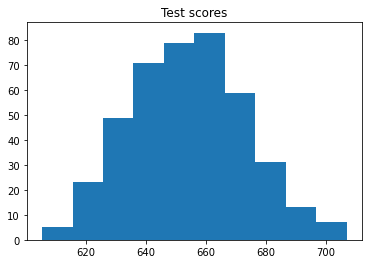

In [4]:
plt.hist(cts.testscr)
plt.title("Test scores")

Text(0.5, 1.0, 'Teachers per students')

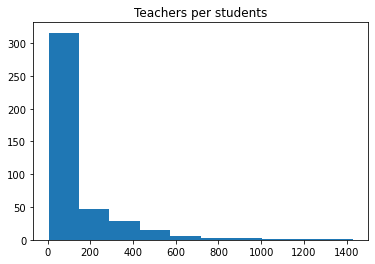

In [5]:
plt.hist(cts.teachers)
plt.title("Teachers per students")

Text(0.5, 1.0, 'Expenditure per student')

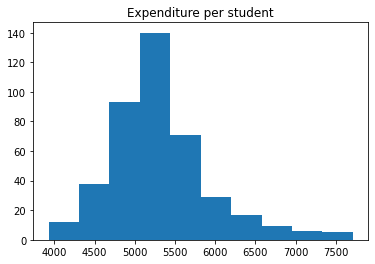

In [6]:
plt.hist(cts.expnstu)
plt.title("Expenditure per student")

Text(0.5, 1.0, 'District average income (in USD 1,000)')

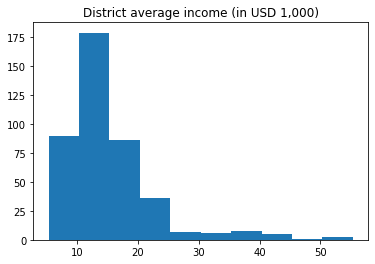

In [7]:
plt.hist(cts.avginc)
plt.title("District average income (in USD 1,000)")

### 1.2 Visualizing the dependency of testscr on each feature

Text(0, 0.5, 'Test Scores')

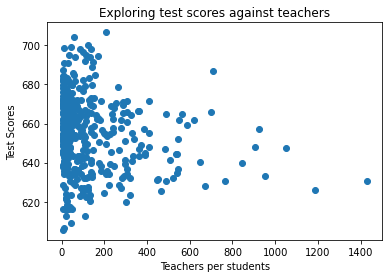

In [8]:
plt.scatter(data = cts, x = 'teachers', y = 'testscr')
plt.title("Exploring test scores against teachers")
plt.xlabel("Teachers per students")
plt.ylabel("Test Scores")

Exploring the relationship between test scores and expenditure per student

Text(0, 0.5, 'Test Scores')

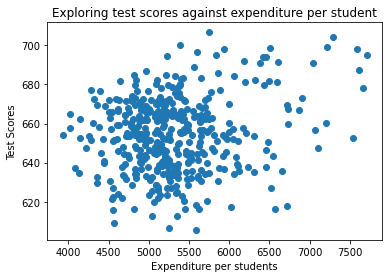

In [9]:
plt.scatter(data = cts, x = 'expnstu', y = 'testscr')
plt.title("Exploring test scores against expenditure per student")
plt.xlabel("Expenditure per students")
plt.ylabel("Test Scores")

Exploring the relationship between test scores and average income

Text(0, 0.5, 'Test Scores')

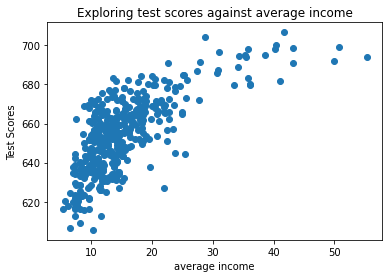

In [10]:
plt.scatter(data = cts, x = 'avginc', y = 'testscr')
plt.title("Exploring test scores against average income")
plt.xlabel("average income")
plt.ylabel("Test Scores")

### 1.3 Splitting data and running models

Split data in training and test set. Build models that evaluate the relationship between all available X variables in the California test dataset and the target variable. Evaluate KNN for regression, Linear Regression (OLS), Ridge, and Lasso using cross-validation with the default parameters. Does scaling the data with the StandardScaler help?

In [11]:
y = cts['testscr']
X = cts
X = X.drop(['Unnamed: 0','distcod', 'county', 'district', 'grspan', 'testscr', 'readscr', 'mathscr'], axis = 1)

In [12]:
print(y[0:5])
y.describe()

0    690.799988
1    661.200012
2    643.599976
3    647.700012
4    640.849976
Name: testscr, dtype: float64


count    420.000000
mean     654.156548
std       19.053348
min      605.550049
25%      640.049988
50%      654.449982
75%      666.662506
max      706.750000
Name: testscr, dtype: float64

In [13]:
X.head(10)

,enrltot,teachers,calwpct,mealpct,computer,compstu,expnstu,str,avginc,elpct
0,195,10.900000,0.510200,2.040800,67,0.343590,6384.911133,17.889910,22.690001,0.000000
1,240,11.150000,15.416700,47.916698,101,0.420833,5099.380859,21.524664,9.824000,4.583333
2,1550,82.900002,55.032299,76.322601,169,0.109032,5501.954590,18.697226,8.978000,30.000002
3,243,14.000000,36.475399,77.049202,85,0.349794,7101.831055,17.357143,8.978000,0.000000
4,1335,71.500000,33.108601,78.427002,171,0.128090,5235.987793,18.671329,9.080333,13.857677
5,137,6.400000,12.318800,86.956497,25,0.182482,5580.146973,21.406250,10.415000,12.408759
6,195,10.000000,12.903200,94.623703,28,0.143590,5253.331055,19.500000,6.577000,68.717949
7,888,42.500000,18.806299,100.000000,66,0.074324,4565.746094,20.894117,8.174000,46.959461
8,379,19.000000,32.189999,93.139801,35,0.092348,5355.548340,19.947369,7.385000,30.079157
9,2247,108.000000,78.994202,87.316399,0,0.000000,5036.211426,20.805555,11.613333,40.275921


Splitting data into train and test

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

print(X.shape)
X_train.shape

(420, 10)


(315, 10)

In [15]:
from sklearn.model_selection import cross_val_score

KNN Regression with CV:

In [16]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
print("KNN Test Set Score: {}".format(knn.score(X_test, y_test)))
print("Cross Validation Score: {}".format(
np.mean(cross_val_score(KNeighborsRegressor(), X_train, y_train))))

KNN Test Set Score: -0.024171618599885036
Cross Validation Score: 0.056419691811426434


Linear Regression with CV:

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print("lr.coef_: {}".format(lr.coef_)) #maintains order, first coeff is for x1, second for x2 and so on..
print("lr.intercept_: {}".format(lr.intercept_))
print("lr Test Set Score: {}".format(lr.score(X_test, y_test)))
print("Cross Validation Score: {}".format(np.mean(cross_val_score(LinearRegression(), X_train, y_train, scoring ='r2'))))

lr.coef_: [-6.63772796e-04  6.98908851e-03 -1.36133678e-01 -3.28932668e-01
  2.13560444e-03  9.76154170e+00  2.03541995e-03 -1.39945887e-01
  6.05434670e-01 -2.04283374e-01]
lr.intercept_: 655.8634637868303
lr Test Set Score: 0.7993552953872123
Cross Validation Score: 0.7944550222758906


Lasso with CV:

In [18]:
from sklearn.linear_model import Lasso
lasso = Lasso(max_iter = 100000).fit(X_train, y_train)
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0))) 
print(X.columns)
print("Lasso Training set score: {}".format(lasso.score(X_train, y_train)))
print("Lasso Test set score: {}".format(lasso.score(X_test, y_test)))
print("Cross Validation Score: {}".format(np.mean(cross_val_score(Lasso(max_iter = 10000), X_train, y_train, scoring ='r2'))))

Number of features used: 8
Index(['enrltot', 'teachers', 'calwpct', 'mealpct', 'computer', 'compstu',
       'expnstu', 'str', 'avginc', 'elpct'],
      dtype='object')
Lasso Training set score: 0.8069571040719052
Lasso Test set score: 0.7984165014866671
Cross Validation Score: 0.7949246913086221


Ridge with CV:

In [19]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Ridge Training set score: {}".format(ridge.score(X_train, y_train)))
print("Ridge Test set score: {}".format(ridge.score(X_test, y_test)))
print("Cross Validation Score: {}".format(np.mean(cross_val_score(Ridge(),X_train, y_train, scoring ='r2' ))))

Ridge Training set score: 0.8079092551135484
Ridge Test set score: 0.7991087392263193
Cross Validation Score: 0.7942492744131302


Scaling data with StandardScaler

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
lr.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)
lasso = Lasso().fit(X_train_scaled, y_train)
ridge = Ridge().fit(X_train_scaled, y_train)
print("OLS Training set score: {}".format(lr.score(X_train_scaled, y_train)))
print("KNN Training set score: {}".format(knn.score(X_train_scaled, y_train)))
print("lasso Training set score: {}".format(lasso.score(X_train_scaled, y_train)))
print("ridge Training set score: {}".format(ridge.score(X_train_scaled, y_train)))

OLS Training set score: 0.8081261044509858
KNN Training set score: 0.8224955889765936
lasso Training set score: 0.7989991930195282
ridge Training set score: 0.8081043323305925


In [22]:
print("OLS Test set score: {}".format(lr.score(X_test_scaled, y_test)))
print("KNN Test set score: {}".format(knn.score(X_test_scaled, y_test)))
print("lasso Test set score: {}".format(lasso.score(X_test_scaled, y_test)))
print("ridge Test set score: {}".format(ridge.score(X_test_scaled, y_test)))

OLS Test set score: 0.799355295387211
KNN Test set score: 0.7291789280885017
lasso Test set score: 0.7942528265835384
ridge Test set score: 0.7987745139024802


In [23]:
print("KNN Cross Validation Score: {}".format(cross_val_score(KNeighborsRegressor(), X_train_scaled, y_train).mean()))
print("Linear Regression Cross Validation Score: {}".format(np.mean(cross_val_score(LinearRegression(), X_train_scaled, y_train, scoring ='r2'))))
print("Lasso Cross Validation Score: {}".format(np.mean(cross_val_score(Lasso(), X_train_scaled, y_train, scoring = 'r2'))))
print("Ridge Cross Validation Score: {}".format(np.mean(cross_val_score(Ridge(),X_train_scaled, y_train, scoring = 'r2' ))))

KNN Cross Validation Score: 0.739300987428608
Linear Regression Cross Validation Score: 0.7944550222758906
Lasso Cross Validation Score: 0.7875164895598433
Ridge Cross Validation Score: 0.7953573083684289


Scaling the data affected the Cross Validation Score for each model differently. The biggest improvement was in the KNN model; before scaling, the test score was negative but after scaling the model started perfomring a lot better on the test set. The linear (OLS) model CV and test set score did not change after scaling. The lasso and ridge scores had a minimal reduction in their test scores after scaling.

### 1.4 Tuning Models with GridSearchCV

In [24]:
#KNN GridSearchCV with unscaled values
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 10, 1)}
grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid)
grid_knn.fit(X_train, y_train)
print("best mean cross-validation score: {}".format(grid_knn.best_score_))
print("best parameters: {}".format(grid_knn.best_params_))
print("test-set score: {}".format(grid_knn.score(X_test, y_test)))

best mean cross-validation score: 0.05764909413407917
best parameters: {'n_neighbors': 6}
test-set score: 0.007070614445355061


In [25]:
#Lasso GridSearchCV with unscaled values
lasso_params = {'alpha':np.arange(0.05, 1, 0.05)}
grid_lasso = GridSearchCV(Lasso(max_iter =100000), lasso_params)
grid_lasso.fit(X_train, y_train)
print("best mean cross-validation score: {}".format(grid_lasso.best_score_))
print("best parameters: {}".format(grid_lasso.best_params_))
print("test-set score: {}".format(grid_lasso.score(X_test, y_test)))

best mean cross-validation score: 0.7949909551604188
best parameters: {'alpha': 0.7500000000000001}
test-set score: 0.7984104412137029


In [26]:
#Ridge GridSearchCV with unscaled values
ridge_params = {'alpha':np.arange(0, 1, 0.05)}
grid_ridge = GridSearchCV(Ridge(), ridge_params)
grid_ridge.fit(X_train, y_train)
print("best mean cross-validation score: {}".format(grid_ridge.best_score_))
print("best parameters: {}".format(grid_ridge.best_params_))
print("test-set score: {}".format(grid_ridge.score(X_test, y_test)))

best mean cross-validation score: 0.7944579849808481
best parameters: {'alpha': 0.05}
test-set score: 0.7993488472140472


In [27]:
#KNN GridSearchCV with scaled values
param_grid = {'n_neighbors': np.arange(1, 10, 1)}
grid_knn_scaled = GridSearchCV(KNeighborsRegressor(), param_grid)
grid_knn_scaled.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {}".format(grid_knn_scaled.best_score_))
print("best parameters: {}".format(grid_knn_scaled.best_params_))
print("test-set score: {}".format(grid_knn_scaled.score(X_test_scaled, y_test)))


best mean cross-validation score: 0.7531474075180512
best parameters: {'n_neighbors': 8}
test-set score: 0.7000286027040385


In [28]:
#Lasso GridSearchCV with scaled values
lasso_params = {'alpha':np.arange(0.05, 1, 0.05)}
grid_lasso_scaled = GridSearchCV(Lasso(), lasso_params)
grid_lasso_scaled.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {}".format(grid_lasso_scaled.best_score_))
print("best parameters: {}".format(grid_lasso_scaled.best_params_))
print("test-set score: {}".format(grid_lasso_scaled.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.7957126479196931
best parameters: {'alpha': 0.1}
test-set score: 0.7996757041748722


In [29]:
#Ridge GridSearchCV with scaled values
ridge_params = {'alpha':np.arange(0, 1, 0.05)}
grid_ridge_scaled = GridSearchCV(Ridge(), ridge_params)
grid_ridge_scaled.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {}".format(grid_ridge_scaled.best_score_))
print("best parameters: {}".format(grid_ridge_scaled.best_params_))
print("test-set score: {}".format(grid_ridge_scaled.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.7953398931950223
best parameters: {'alpha': 0.9500000000000001}
test-set score: 0.798804528929947


I ran GridSearchCV for KNN, Ridge and Lasso- with and without scaled values. The KNN results improve with both scaled and unscaled values but the scaled knn model has a bigger improvement. In the case of lasso, the values improve minimally with gridserachCV in both scaled and unscaled cases. In the case of Ridge, there is a bigger improvement in the unscaled model than in the scaled model. 

### 1.5 Comparing Linear Model Coefficients

In [30]:
print("Linear Regression Coefficients:\n{}".format(LinearRegression().fit(X_train_scaled, y_train).coef_))

Linear Regression Coefficients:
[-2.65924605  1.3495415  -1.61906375 -8.97046881  0.93812036  0.64041941
  1.30257187 -0.26138847  4.49027776 -3.7413484 ]


In [31]:
print("Lasso Coefficients:\n{}" .format( Lasso(alpha = 0.1).fit(X_train_scaled, y_train).coef_))

Lasso Coefficients:
[-0.35138333 -0.         -1.45350443 -9.10949543  0.          0.75375122
  1.19755278 -0.2914449   4.50101505 -3.6455013 ]


The two best models - giving the highest test scores and cross valdiation scores - are the linear model with scaled values and the GridSearch Lasso model with scaled values. Although there is no virtual difference between the scaled and unscaled linear models, I chose to use the scaled version for the purpose of this comparision with the lasso scaled model. 

_____
Both models - scaled linear regression, and scaled and tuned lasso - do agree on mealpct having the biggest effect on the feature. However, the lasso model zeroes out two of the features that the linear model considers important: teachers and computer. The rest of the features have similar degrees of influence on the target in both of these models. 

In [32]:
X_train.columns

Index(['enrltot', 'teachers', 'calwpct', 'mealpct', 'computer', 'compstu',
       'expnstu', 'str', 'avginc', 'elpct'],
      dtype='object')

### 1.6 Final Model
I would use the tuned Lasso model with scaled values with alpha set to 0.1. This model performs the best out of all the ones explored in this assignment: it has a test score of 0.7996 and a cross validation score of 0.7957. It is also easier to interpret and computationally more feasible than the other models due to reduced number of features.

## Part 2: Classification on red and white wine characteristics

### Importing the files into separate dataframes 

In [33]:
redwine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
redwine['winetype'] = 1
redwine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [34]:
whitewine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')
whitewine['winetype'] = 0
whitewine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [35]:
wines = [redwine, whitewine]
wine_char = pd.concat(wines)

In [36]:
redwine.shape

(1599, 13)

In [37]:
whitewine.shape

(4898, 13)

In [38]:
wine_char.shape

(6497, 13)

### 2.1: Visualizing univariate distribution

In [39]:
wine_char.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'winetype'],
      dtype='object')

array([[<AxesSubplot:title={'center':'winetype'}>]], dtype=object)

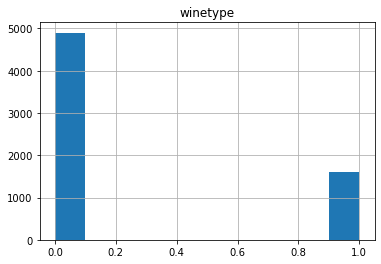

In [40]:
wine_char.hist(['winetype'])

Volatile Acidity

array([[<AxesSubplot:title={'center':'volatile acidity'}>]], dtype=object)

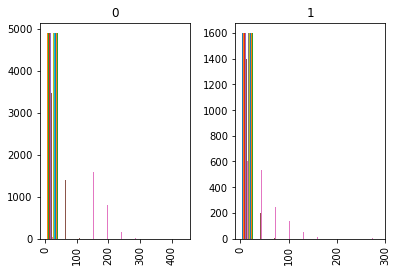

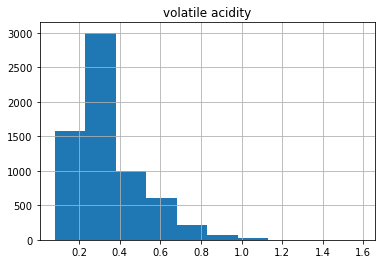

In [41]:
wine_char.hist(['volatile acidity'], by=wine_char['winetype'])
wine_char.hist(['volatile acidity'])

Residual Sugar

array([[<AxesSubplot:title={'center':'residual sugar'}>]], dtype=object)

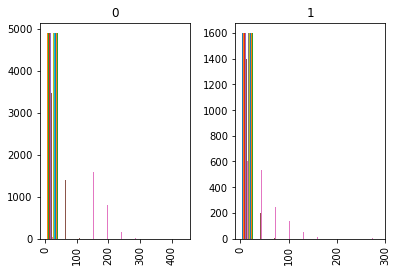

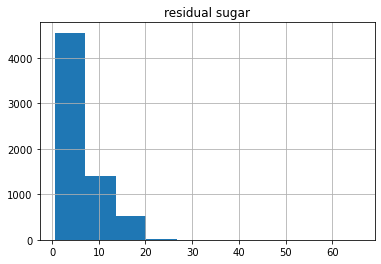

In [42]:
wine_char.hist(['residual sugar'], by=wine_char['winetype'])
wine_char.hist(['residual sugar'])

Total Sulfur Dioxide

array([[<AxesSubplot:title={'center':'total sulfur dioxide'}>]],
      dtype=object)

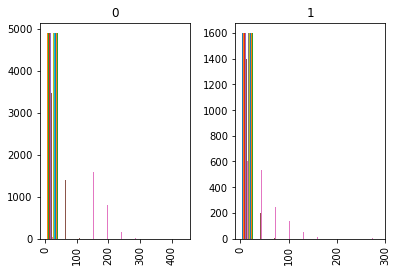

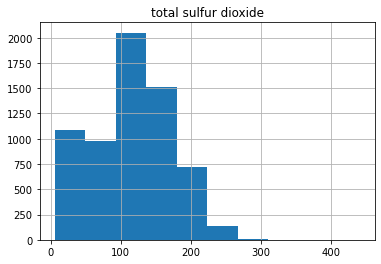

In [43]:
wine_char.hist(['total sulfur dioxide'], by=wine_char['winetype'])
wine_char.hist(['total sulfur dioxide'])

### 2.2: Splitting data and running models

In [44]:
y = wine_char['winetype']

In [45]:
X = wine_char
X = X.drop(['winetype'], axis = 1)

In [46]:
X.shape

(6497, 12)

In [47]:
X.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [48]:
#Renaming vriables for ease of analysis
?X.rename

In [49]:
X = X.rename(columns = {"fixed acidity":"fixed_acid", "volatile acidity": "volat_acid", "citric acid":"cit_acid",
                       "residual sugar": "resid_sugar", "free sulfur dioxide":"free_sulf_diox", 
                        "total sulfur dioxide": "tot_sulf_diox"})

In [50]:
X.head(5)

,fixed_acid,volat_acid,cit_acid,resid_sugar,chlorides,free_sulf_diox,tot_sulf_diox,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Splitting Data into train and test

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(4872, 12)
(1625, 12)


Logistic Regression with cross validation

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
logreg = LogisticRegression(max_iter = 100000, penalty = 'none')
logreg.fit(X_train, y_train)
print("logreg .coef_: {}".format(logreg .coef_))
print("Training set score: {}".format(logreg.score(X_train, y_train)))
print("Test set score: {}".format(logreg.score(X_test, y_test)))
print("Logistic Reg Cross Validation Score: {}".format(np.mean(cross_val_score(LogisticRegression(max_iter =100000, penalty = 'none'), X_train, y_train))))

logreg .coef_: [[ 1.48164361e+00  1.06630412e+01 -1.20344568e+00 -3.74056809e-02
   3.52738160e+01  5.52400668e-02 -6.28597728e-02 -2.10992206e+01
   9.64517696e+00  8.40310398e+00 -2.73128894e-01 -1.43409146e-02]]
Training set score: 0.9878899835796388
Test set score: 0.9907692307692307
Logistic Reg Cross Validation Score: 0.9903509714105196


Penalized Logistic Regression with cross validation - l1 penalty

In [54]:
pl1_logreg = LogisticRegression(max_iter = 100000, penalty = 'l1', solver = 'saga')
pl1_logreg.fit(X_train, y_train)
print("logreg .coef_: {}".format(pl1_logreg .coef_))
print("Training set score: {}".format(pl1_logreg.score(X_train, y_train)))
print("Test set score: {}".format(pl1_logreg.score(X_test, y_test)))
print("L1 Penalized Logistic Reg Cross Validation Score: {}".format(np.mean(cross_val_score(LogisticRegression(max_iter = 100000, penalty = 'l1', solver = 'saga'), X_train, y_train))))

logreg .coef_: [[ 0.71747165  2.56770737 -0.69874005 -0.13420091  0.32217711  0.03720283
  -0.05842328 -0.0146413   1.71998346  1.76756756 -0.69502383 -0.25107554]]
Training set score: 0.9649014778325123
Test set score: 0.9704615384615385
L1 Penalized Logistic Reg Cross Validation Score: 0.9642872637287422


Penalized Logistic Regression with cross validation - l2 penalty

In [55]:
pl2_logreg = LogisticRegression(max_iter = 100000, penalty = 'l2')
pl2_logreg.fit(X_train, y_train)
print("logreg .coef_: {}".format(pl2_logreg .coef_))
print("Training set score: {}".format(pl2_logreg.score(X_train, y_train)))
print("Test set score: {}".format(pl2_logreg.score(X_test, y_test)))
print("L2 Penalized Logistic Reg Cross Validation Score: {}".format(np.mean(cross_val_score(LogisticRegression(max_iter = 100000, penalty = 'l2'), X_train, y_train))))

logreg .coef_: [[ 1.13110558  7.91332866 -0.79366138 -0.08805109  2.73520456  0.04437431
  -0.0541963   0.23724942  5.82116007  5.75746144 -0.42781567 -0.09272086]]
Training set score: 0.9839901477832512
Test set score: 0.9913846153846154
L2 Penalized Logistic Reg Cross Validation Score: 0.9821428947506977


KNN Classifier with cross validation

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("Test Set Score: {}".format(knn.score(X_test, y_test)))
print("KNN Classifier Cross Validation Score: {}".format(np.mean(cross_val_score(KNeighborsClassifier(), X_train, y_train))))

Test Set Score: 0.9501538461538461
KNN Classifier Cross Validation Score: 0.9378107723898278


All the models give exceptionally high test-score and cross validation scores. This might be due to overfitting in the models. The L2 penalized logistic regression model has the highest test-set score at 0.99138. The Knn classfier model has the lowest test-set score at 0.9378. The L2 penalized logistic model and the unpenalized logistic model give very similar test-set scores. 

Scaling data with StandardScaler

In [57]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
X_train_scaled.shape

(4872, 12)

In [59]:
X_test_scaled.shape

(1625, 12)

In [60]:
#Pre-scaled values
print("Unscaled values:\n")
print("Logistic Regression Test-set score: {}".format(logreg.score(X_test, y_test)))
print("L1 Penalized Logistic Regression Test-set score: {}".format(pl1_logreg.score(X_test, y_test)))
print("L2 Penalized Logistic Regression Test-set score: {}".format(pl2_logreg.score(X_test, y_test)))
print("Knn Classifier Test-set score: {}".format(knn.score(X_test, y_test)))
print("\n")
print("Logistic Reg Cross Validation Score: {}".format(np.mean(cross_val_score(LogisticRegression(max_iter =100000, penalty = 'none'), X_train, y_train))))
print("L1 Penalized Logistic Reg Cross Validation Score: {}".format(np.mean(cross_val_score(LogisticRegression(max_iter = 100000, penalty = 'l1', solver = 'saga'), X_train, y_train))))
print("L2 Penalized Logistic Reg Cross Validation Score: {}".format(np.mean(cross_val_score(LogisticRegression(max_iter = 100000, penalty = 'l2'), X_train, y_train))))
print("KNN Classifier Cross Validation Score: {}".format(np.mean(cross_val_score(KNeighborsClassifier(), X_train, y_train))))

Unscaled values:

Logistic Regression Test-set score: 0.9907692307692307
L1 Penalized Logistic Regression Test-set score: 0.9704615384615385
L2 Penalized Logistic Regression Test-set score: 0.9913846153846154
Knn Classifier Test-set score: 0.9501538461538461


Logistic Reg Cross Validation Score: 0.9903509714105196
L1 Penalized Logistic Reg Cross Validation Score: 0.9642872637287422
L2 Penalized Logistic Reg Cross Validation Score: 0.9821428947506977
KNN Classifier Cross Validation Score: 0.9378107723898278


In [61]:
logreg.fit(X_train_scaled, y_train)
pl1_logreg.fit(X_train_scaled, y_train)
pl2_logreg.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)
print("Scaled values:\n")
print("Logistic Regression Test-set score: {}".format(logreg.score(X_test_scaled, y_test)))
print("L1 Penalized Logistic Regression Test-set score: {}".format(pl1_logreg.score(X_test_scaled, y_test)))
print("L2 Penalized Logistic Regression Test-set score: {}".format(pl2_logreg.score(X_test_scaled, y_test)))
print("Knn Classifier Test-set score: {}".format(knn.score(X_test_scaled, y_test)))
print("\n")
print("Logistic Reg Cross Validation Score: {}".format(np.mean(cross_val_score(LogisticRegression(max_iter =100000, penalty = 'none'), X_train_scaled, y_train))))
print("L1 Penalized Logistic Reg Cross Validation Score: {}".format(np.mean(cross_val_score(LogisticRegression(max_iter = 100000, penalty = 'l1', solver = 'saga'), X_train_scaled, y_train))))
print("L2 Penalized Logistic Reg Cross Validation Score: {}".format(np.mean(cross_val_score(LogisticRegression(max_iter = 100000, penalty = 'l2'), X_train_scaled, y_train))))
print("KNN Classifier Cross Validation Score: {}".format(np.mean(cross_val_score(KNeighborsClassifier(), X_train_scaled, y_train))))


Scaled values:

Logistic Regression Test-set score: 0.9944615384615385
L1 Penalized Logistic Regression Test-set score: 0.9950769230769231
L2 Penalized Logistic Regression Test-set score: 0.9944615384615385
Knn Classifier Test-set score: 0.9969230769230769


Logistic Reg Cross Validation Score: 0.9944577475912177
L1 Penalized Logistic Reg Cross Validation Score: 0.9946630864002527
L2 Penalized Logistic Reg Cross Validation Score: 0.9944577475912177
KNN Classifier Cross Validation Score: 0.991585110303796


Scaling the values with StandardScaler improves the test-set scores and the cross validation scores for all the models. 

### 2.3: Tuning Parameters with GridSearchCV

In [62]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
grid_logreg = GridSearchCV(LogisticRegression(max_iter = 100000, penalty = 'none'), param_grid)
grid_logreg.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {}".format(grid_logreg.best_score_))
print("best parameters: {}".format(grid_logreg.best_params_))
print("test-set score: {}".format(grid_logreg.score(X_test_scaled, y_test)))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalt

best mean cross-validation score: 0.9944577475912177
best parameters: {'C': 0.001}
test-set score: 0.9944615384615385


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


In [63]:
grid_l1plogreg = GridSearchCV(LogisticRegression(max_iter = 100000, penalty = 'l1', solver = 'saga'), param_grid)
grid_l1plogreg.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {}".format(grid_l1plogreg.best_score_))
print("best parameters: {}".format(grid_l1plogreg.best_params_))
print("test-set score: {}".format(grid_l1plogreg.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.9946630864002527
best parameters: {'C': 1}
test-set score: 0.9950769230769231


In [64]:
grid_l2plogreg = GridSearchCV(LogisticRegression(max_iter = 100000, penalty = 'l2'), param_grid)
grid_l2plogreg.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {}".format(grid_l2plogreg.best_score_))
print("best parameters: {}".format(grid_l2plogreg.best_params_))
print("test-set score: {}".format(grid_l2plogreg.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.9946630864002527
best parameters: {'C': 10}
test-set score: 0.9950769230769231


In [65]:
param_grid = {'n_neighbors': np.arange(1, 10, 1)}
grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid)
grid_knn.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {}".format(grid_knn.best_score_))
print("best parameters: {}".format(grid_knn.best_params_))
print("test-set score: {}".format(grid_knn.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.9640434465365241
best parameters: {'n_neighbors': 4}
test-set score: 0.9796175693513415


After using GridSearchCV the results for the unpenalized and penalized logistic regression improve very little. However, the knn scores reduce by a few percentage points.

In [66]:
?GridSearchCV

### 2.4: Changing cv in GridSearchCV to 'kfold'

Changing cross-validation strategy to KFold with shuffling

In [67]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
from sklearn.model_selection import KFold
cv = KFold(shuffle = True)
grid_logreg = GridSearchCV(LogisticRegression(max_iter = 100000, penalty = 'none'), param_grid, cv = cv)
grid_logreg.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {}".format(grid_logreg.best_score_))
print("best parameters: {}".format(grid_logreg.best_params_))
print("test-set score: {}".format(grid_logreg.score(X_test_scaled, y_test)))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalt

best mean cross-validation score: 0.9942538830095298
best parameters: {'C': 0.001}
test-set score: 0.9944615384615385


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


In [68]:
grid_l1plogreg = GridSearchCV(LogisticRegression(max_iter = 100000, penalty = 'l1', solver = 'saga'), param_grid, cv = cv)
grid_l1plogreg.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {}".format(grid_l1plogreg.best_score_))
print("best parameters: {}".format(grid_l1plogreg.best_params_))
print("test-set score: {}".format(grid_l1plogreg.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.9948684252092874
best parameters: {'C': 1}
test-set score: 0.9950769230769231


In [69]:
grid_l2plogreg = GridSearchCV(LogisticRegression(max_iter = 100000, penalty = 'l2'), param_grid, cv = cv)
grid_l2plogreg.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {}".format(grid_l2plogreg.best_score_))
print("best parameters: {}".format(grid_l2plogreg.best_params_))
print("test-set score: {}".format(grid_l2plogreg.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.9946635076080662
best parameters: {'C': 10}
test-set score: 0.9950769230769231


In [70]:
param_grid = {'n_neighbors': np.arange(1, 10, 1)}
grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid, cv = cv)
grid_knn.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {}".format(grid_knn.best_score_))
print("best parameters: {}".format(grid_knn.best_params_))
print("test-set score: {}".format(grid_knn.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.9637283955081737
best parameters: {'n_neighbors': 3}
test-set score: 0.9790805751876311


The tune parameters for the logistic regression and penalized logistic regression don't change but the cross validation score for the penalized logistic regression model improves very minimally after changing cv strategy to KFold with shuffling. The tuning parameter for KNN: n_neighbors goes down 1 neighbor due to this change in the cv strargey but the knn scores don't change except for a very minimal reduction in the cross validation score

Changing the random seed of shuffling

In [71]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
cv = KFold(shuffle = True, random_state= 42)
grid_logreg = GridSearchCV(LogisticRegression(max_iter = 100000, penalty = 'none'), param_grid, cv = cv)
grid_logreg.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {}".format(grid_logreg.best_score_))
print("best parameters: {}".format(grid_logreg.best_params_))
print("test-set score: {}".format(grid_logreg.score(X_test_scaled, y_test)))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalt

best mean cross-validation score: 0.9944579581951245
best parameters: {'C': 0.001}
test-set score: 0.9944615384615385


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


In [72]:
grid_l1plogreg = GridSearchCV(LogisticRegression(max_iter = 100000, penalty = 'l1', solver = 'saga'), param_grid, cv = cv)
grid_l1plogreg.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {}".format(grid_l1plogreg.best_score_))
print("best parameters: {}".format(grid_l1plogreg.best_params_))
print("test-set score: {}".format(grid_l1plogreg.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.9946630864002527
best parameters: {'C': 1}
test-set score: 0.9950769230769231


In [73]:
grid_l2plogreg = GridSearchCV(LogisticRegression(max_iter = 100000, penalty = 'l2'), param_grid, cv = cv)
grid_l2plogreg.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {}".format(grid_l2plogreg.best_score_))
print("best parameters: {}".format(grid_l2plogreg.best_params_))
print("test-set score: {}".format(grid_l2plogreg.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.9944579581951245
best parameters: {'C': 1}
test-set score: 0.9944615384615385


In [74]:
param_grid = {'n_neighbors': np.arange(1, 10, 1)}
grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid, cv = cv)
grid_knn.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {}".format(grid_knn.best_score_))
print("best parameters: {}".format(grid_knn.best_params_))
print("test-set score: {}".format(grid_knn.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.9668448641061582
best parameters: {'n_neighbors': 3}
test-set score: 0.9790805751876311


Changing the random_state of shuffling has no additional effect on all the models' parameters except for on the L2 penalized logistic regression model: the C changes from 10 to 1

Changing the random_state for test train split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [76]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
cv = KFold(shuffle = True)
grid_logreg = GridSearchCV(LogisticRegression(max_iter = 100000, penalty = 'none'), param_grid, cv = cv)
grid_logreg.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {}".format(grid_logreg.best_score_))
print("best parameters: {}".format(grid_logreg.best_params_))
print("test-set score: {}".format(grid_logreg.score(X_test_scaled, y_test)))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalt

best mean cross-validation score: 0.9942532511978097
best parameters: {'C': 0.001}
test-set score: 0.9913846153846154


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


In [77]:
grid_l1plogreg = GridSearchCV(LogisticRegression(max_iter = 100000, penalty = 'l1', solver = 'saga'), param_grid, cv = cv)
grid_l1plogreg.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {}".format(grid_l1plogreg.best_score_))
print("best parameters: {}".format(grid_l1plogreg.best_params_))
print("test-set score: {}".format(grid_l1plogreg.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.99384320539146
best parameters: {'C': 1}
test-set score: 0.9913846153846154


In [78]:
grid_l2plogreg = GridSearchCV(LogisticRegression(max_iter = 100000, penalty = 'l2'), param_grid, cv = cv)
grid_l2plogreg.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {}".format(grid_l2plogreg.best_score_))
print("best parameters: {}".format(grid_l2plogreg.best_params_))
print("test-set score: {}".format(grid_l2plogreg.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.9940472805770547
best parameters: {'C': 100}
test-set score: 0.9913846153846154


In [79]:
param_grid = {'n_neighbors': np.arange(1, 10, 1)}
grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid, cv = cv)
grid_knn.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {}".format(grid_knn.best_score_))
print("best parameters: {}".format(grid_knn.best_params_))
print("test-set score: {}".format(grid_knn.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.971287942362293
best parameters: {'n_neighbors': 2}
test-set score: 0.9559871076081363


Changing the random_state of the train test split changes the parameters for both of the penalized models and for the KNN classifier. 

### 2.5: Comparing unpenalized and penalized logistic regression models

In [80]:
print("Logistic Regression Coefficients:\n{}".format(logreg.fit(X_train_scaled, y_train).coef_)) 
print("L1 penalized Logistic Regression Coefficients:\n{}".format(pl1_logreg.fit(X_train_scaled, y_train).coef_))
print("L2 penalized Logistic Regression Coefficients:\n{}".format(pl2_logreg.fit(X_train_scaled, y_train).coef_))

Logistic Regression Coefficients:
[[ 0.23593592  1.58974487 -0.28658209 -4.93808655  0.79248033  1.29840838
  -3.18179794  4.53207344  0.0204608   0.62839167  1.51230794  0.34655891]]
L1 penalized Logistic Regression Coefficients:
[[ 0.27482138  1.53062778 -0.23969523 -4.30308298  0.75866525  1.06532899
  -2.9797986   3.99730778  0.11917429  0.64784365  1.23783795  0.30477824]]
L2 penalized Logistic Regression Coefficients:
[[ 0.66799484  1.53089613 -0.28169198 -3.32824062  0.85778235  0.89842203
  -2.85276141  3.04102359  0.41924655  0.73896561  0.85589094  0.26665706]]


The L2 penalized logistic regression model seems to show the strongest coefficients among the three models to explain the target; the unpenalized logistic regression and L1 penalized logistic regression have similar coefficients. I would choose the L2 penalized logistic regression to predict new data. 